In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

<ipython-input-81-44a7d0cffeff>:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
df_cocomo = pd.read_excel('/content/drive/MyDrive/Pengujian Perangkat Lunak/cocomo81[1].xlsx',  header=0)
df_cocomo.head()

# df_cocomo = pd.read_excel('/content/sample_data/cocomo81.xlsx',  header=0)
# df_cocomo.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [ ]:
df_cocomo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rely    63 non-null     float64
 1   data    63 non-null     float64
 2   cplx    63 non-null     float64
 3   time    63 non-null     float64
 4   stor    63 non-null     float64
 5   virt    63 non-null     float64
 6   turn    63 non-null     float64
 7   acap    63 non-null     float64
 8   aexp    63 non-null     float64
 9   pcap    63 non-null     float64
 10  vexp    63 non-null     float64
 11  lexp    63 non-null     float64
 12  modp    63 non-null     float64
 13  tool    63 non-null     float64
 14  sced    63 non-null     float64
 15  loc     63 non-null     float64
 16  actual  63 non-null     float64
dtypes: float64(17)
memory usage: 8.5 KB


In [ ]:
df_cocomo.describe()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.113810,1.14381,1.008413,0.971746,0.905238,0.948571,0.93746,1.005238,1.001429,1.004127,1.016984,1.048889,77.209841,683.320635
std,0.193477,0.073431,0.202563,0.161639,0.17942,0.120593,0.080973,0.151507,0.119243,0.16651,0.093375,0.051988,0.130935,0.085735,0.075586,168.509374,1821.582348
min,0.750000,0.940000,0.700000,1.000000,1.00000,0.870000,0.870000,0.710000,0.820000,0.70000,0.900000,0.950000,0.820000,0.830000,1.000000,1.980000,5.900000
25%,0.880000,0.940000,1.000000,1.000000,1.00000,0.870000,0.870000,0.860000,0.820000,0.86000,0.900000,0.950000,0.910000,1.000000,1.000000,8.650000,40.500000
50%,1.000000,1.000000,1.070000,1.060000,1.06000,1.000000,1.000000,0.860000,1.000000,0.86000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,98.000000
75%,1.150000,1.040000,1.300000,1.110000,1.21000,1.150000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.100000,1.100000,1.080000,60.000000,438.000000
max,1.400000,1.160000,1.650000,1.660000,1.56000,1.300000,1.150000,1.460000,1.290000,1.42000,1.210000,1.140000,1.240000,1.240000,1.230000,1150.000000,11400.000000


In [ ]:
df_cocomo.corr()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
rely,1.000000,-0.025756,0.558810,0.702636,0.653910,0.302531,-0.014927,-0.443981,-0.235341,-0.326920,0.137762,0.341757,-0.216759,-0.041416,0.116957,0.040705,0.206627
data,-0.025756,1.000000,-0.322440,-0.093291,-0.062622,-0.208740,0.171882,0.140614,0.086313,0.286958,-0.141398,-0.244446,0.129789,-0.256571,-0.040748,0.371259,0.449327
cplx,0.558810,-0.322440,1.000000,0.487513,0.518859,0.315773,-0.017265,-0.464257,-0.120710,-0.453460,0.305135,0.481337,-0.126959,0.268192,0.134628,-0.199148,0.010789
time,0.702636,-0.093291,0.487513,1.000000,0.677825,0.445400,0.011684,-0.323218,-0.142139,-0.258279,0.297234,0.441756,-0.080393,0.147607,0.120221,-0.054815,0.152347
stor,0.653910,-0.062622,0.518859,0.677825,1.000000,0.415795,0.187268,-0.191920,-0.208944,-0.179018,0.154849,0.372211,0.107660,0.221055,-0.059505,-0.034909,0.104567
virt,0.302531,-0.208740,0.315773,0.445400,0.415795,1.000000,0.206098,-0.155702,0.061194,-0.162539,0.697887,0.692414,0.135768,0.518549,0.253547,-0.188589,0.018532
turn,-0.014927,0.171882,-0.017265,0.011684,0.187268,0.206098,1.000000,0.129532,0.014628,0.120081,-0.029815,0.038096,0.498751,0.342534,0.093875,0.083331,0.205835
acap,-0.443981,0.140614,-0.464257,-0.323218,-0.191920,-0.155702,0.129532,1.000000,0.376905,0.667691,-0.277306,-0.378156,0.384362,0.028057,0.090796,-0.137508,-0.147825
aexp,-0.235341,0.086313,-0.120710,-0.142139,-0.208944,0.061194,0.014628,0.376905,1.000000,0.097782,0.231153,0.043004,-0.052095,-0.145890,0.352354,-0.110563,-0.035568
pcap,-0.326920,0.286958,-0.453460,-0.258279,-0.179018,-0.162539,0.120081,0.667691,0.097782,1.000000,-0.202041,-0.306632,0.530107,0.030638,-0.084808,0.158249,0.157074


<Axes: title={'center': 'Pearson Correlation of Features'}>

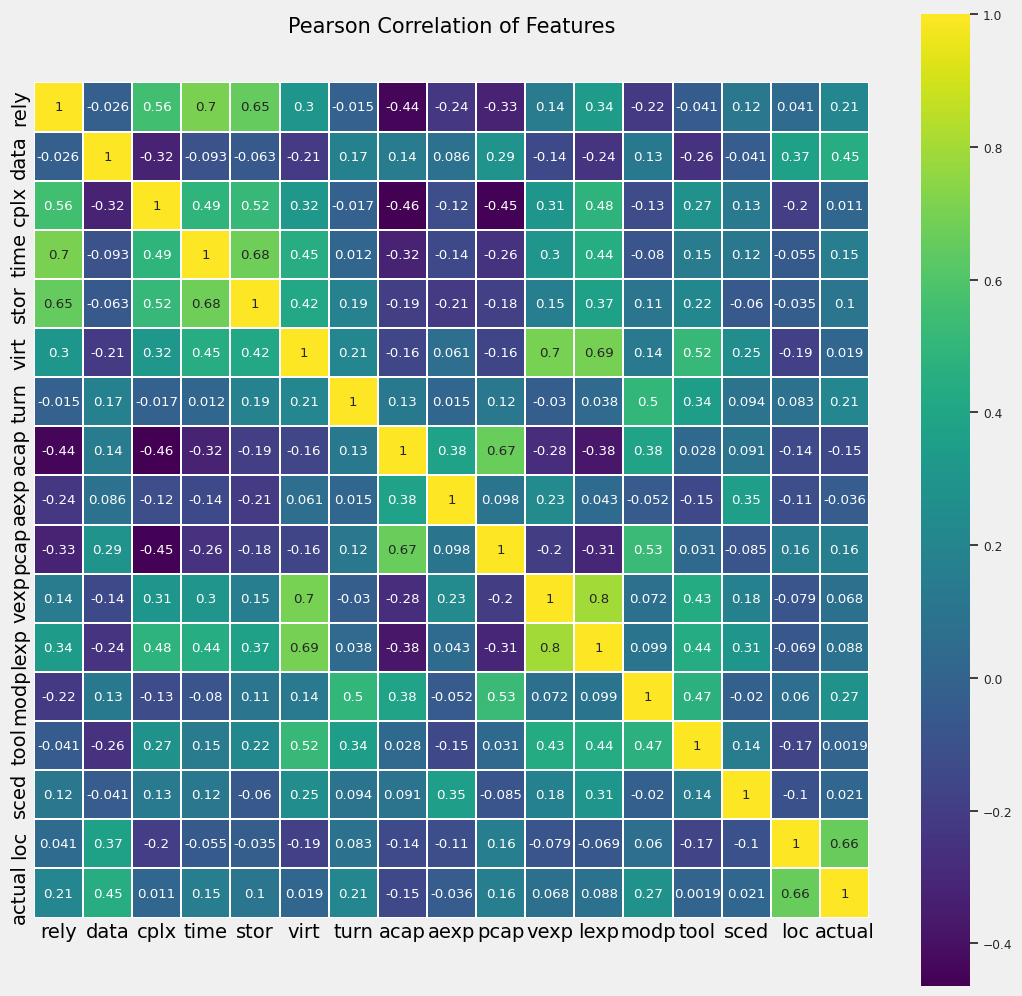

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=0.8)
sns.heatmap(df_cocomo.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [ ]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in df_cocomo.columns:
    if i == df_cocomo.columns[0]:
      removeOutliers(df_cocomo, i)
    else:
      removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column rely is: 0.2699999999999999
IQR value for column data is: 0.10000000000000009
IQR value for column cplx is: 0.30000000000000004
IQR value for column time is: 0.1100000000000001
IQR value for column stor is: 0.11999999999999988
IQR value for column virt is: 0.13
IQR value for column turn is: 0.13
IQR value for column acap is: 0.14
IQR value for column aexp is: 0.18000000000000005
IQR value for column pcap is: 0.14
IQR value for column vexp is: 0.20000000000000007
IQR value for column lexp is: 0.050000000000000044
IQR value for column modp is: 0.19000000000000006
IQR value for column tool is: 0.10000000000000009
IQR value for column sced is: 0.040000000000000036
IQR value for column loc is: 70.5
IQR value for column actual is: 86.0
Shape of data after outlier removal is:  (25, 17)


In [ ]:
features = ['rely','data','cplx','time','stor','virt','turn','acap','aexp','pcap','vexp','lexp','modp','tool','sced','loc','actual']

# max_corr_features = ['vexp','lexp', 'loc', 'virt', 'loc']
max_corr_features = ['stor', 'vexp', 'virt', 'acap', 'modp', 'loc', 'lexp']
# max_corr_features = ['stor', 'vexp', 'virt', 'acap', 'modp', 'lexp', 'loc']
# max_corr_features = ['stor', 'data', 'time', 'turn', 'virt', 'cplx', 'rely']
# max_corr_features = ['rely','data','cplx','time','stor','virt','turn','acap','aexp','pcap','vexp','lexp','modp','tool','sced','loc']
# max_corr_features = ['rely','cplx','time','stor','virt','turn','vexp','lexp','tool','loc']
# max_corr_features = ['rely','time','stor','virt','turn','vexp','lexp','loc']
# max_corr_features = ['rely','time','stor','virt','turn','vexp','lexp','loc']


X = data[max_corr_features]
y = data['actual']

# X = df_cocomo[max_corr_features]
# y = df_cocomo['actual']

<Axes: title={'center': 'Pearson Correlation of Features'}>

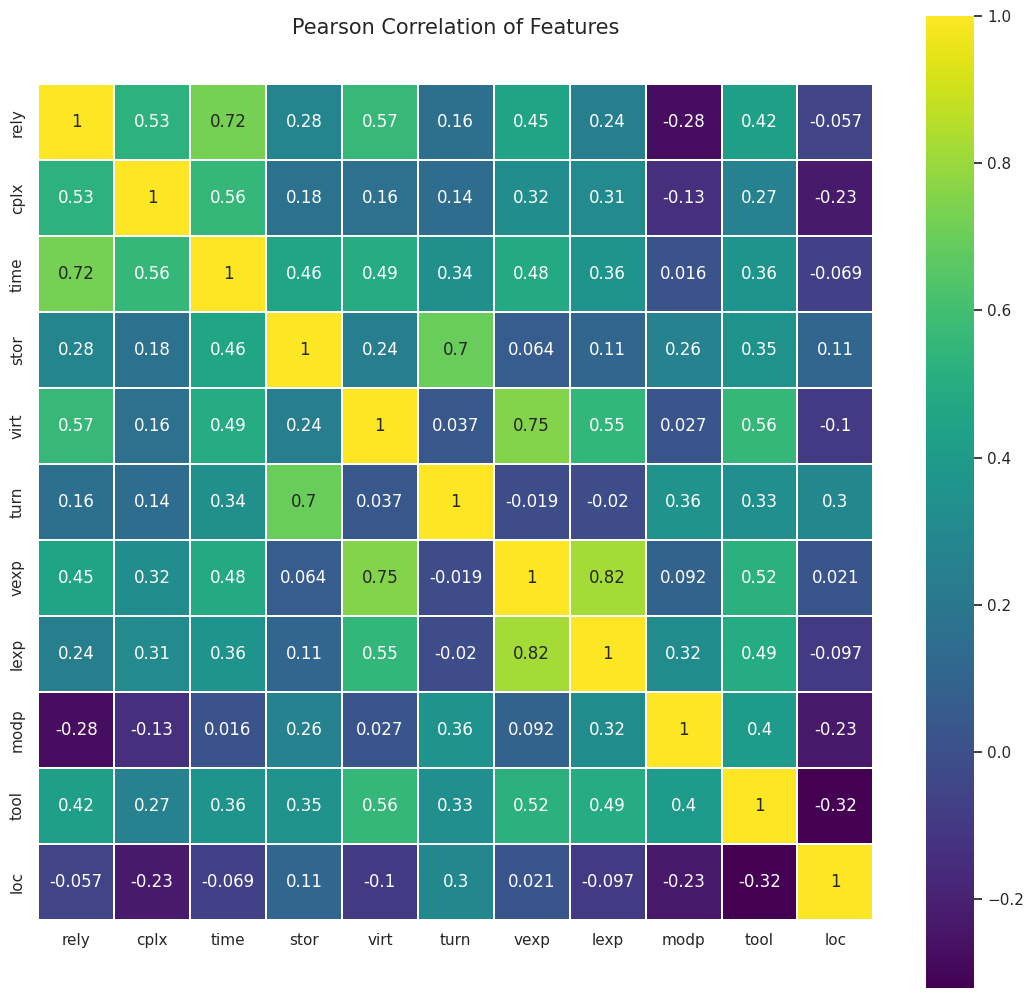

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.0)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)

predict = neigh.predict(X_test)

# Menghitung R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predict)

# Menghitung Mean Square Error (MSE)
mse_knn = mean_squared_error(y_test, predict)*0.00001

# Menghitung Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predict)*0.001

# Menghitung Mean Magnitude of Relative Error (MMRE)
mmre_knn = np.mean((predict - y_test) / y_test)

# Menghitung Median Magnitude of Relative Error (MdMRE)
mdmre_knn = np.median((predict - y_test) / y_test)

# Menghitung Mean Magnitude of Error Relative (MMER)
mmer_knn = (abs(predict - y_test)).mean()*0.001

# Menghitung Prediction Accuracy 25%
acc_25_knn = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Menghitung Prediction Accuracy 50%
acc_50_knn = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

#RMSE
rmse_knn = np.sqrt(mse_knn)

# Menampilkan hasil dalam bentuk persentase
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_knn))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_knn))
print("Root Mean Square (RMSE):",rmse_knn)
print("R-squared (R2):", r_squared)
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Magnitude of Relative Error (MMRE):", mmre_knn)
print("Median Magnitude of Relative Error (MdMRE):", mdmre_knn)
print("Mean Magnitude of Error Relative (MMER):", mmer_knn )
print("Mean Square Error: ",mse_knn)

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_KNN = np.mean(cross_val_score(neigh, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_KNN))

Prediction Accuracy 25%: 22.22%
Prediction Accuracy 50%: 66.67%
Root Mean Square (RMSE): 0.0784715093379615
R-squared (R2): 0.5436763521920516
Mean Absolute Error (MAE): 0.020148148148148144
Mean Magnitude of Relative Error (MMRE): 0.5670180254645625
Median Magnitude of Relative Error (MdMRE): -0.1333333333333334
Mean Magnitude of Error Relative (MMER): 0.020148148148148144
Mean Square Error:  0.0061577777777777785
Mean Score (Neg MSE) from 10-fold Cross Validation: -1931.80


Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predict = model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, predict))*0.001
mae_linear = mean_absolute_error(y_test, predict)*0.001
print("Root mean square: ", rmse_linear)
print("Mean Absolute Error: ", mae_linear)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_linear = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_linear = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_linear = model.score(X_test, y_test)

# Mean Magnitude of Relative Error
mmre_linear = (abs((predict - y_test) / y_test)).mean()*0.1

# Median Magnitude of Relative Error
mdmre_linear = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_linear = (abs(predict - y_test)).mean()*0.001

# Mean Square Error
mse_linear = mean_squared_error(y_test, predict)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_linear))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_linear))
print("R Square: {:.4f}".format(r_square_linear))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_linear))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_linear))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_linear))
print("Mean Square Error: {:.4f}".format(mse_linear))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_linear = np.mean(cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_linear))

0.3120943150902685
Root mean square:  0.05415334152279127
Mean Absolute Error:  0.04171885939457294
Prediction Accuracy 25%: 22.22%
Prediction Accuracy 50%: 33.33%
R Square: 0.3121
Mean Magnitude of Relative Error: 0.1226
Median Magnitude of Relative Error: 0.6135
Mean Magnitude of Error Relative: 0.0417
Mean Square Error: 0.0029
Mean Score (Neg MSE) from 10-fold Cross Validation: -1424.61


SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))
predict = LinearSVC.predict(X_test)
rmse_svm =np.sqrt(mean_squared_error(y_test, predict))*0.0001
mae_svm = mean_absolute_error(y_test, predict)*0.0001
print("Root mean square: ", rmse_svm )
print("Mean Absolute Error: ", mae_svm)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_svm = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_svm = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_svm = r2_score(y_test, predict)

# Mean Magnitude of Relative Error
mmre_svm = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_svm = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_svm = (abs(predict - y_test)).mean()*0.0001

# Mean Square Error
mse_svm = mean_squared_error(y_test, predict)*0.0000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_svm))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_svm))
print("R Square: {:.4f}".format(r_square_svm))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_svm))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_svm))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_svm))
print("Mean Square Error: {:.4f}".format(mse_svm))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_SVM = np.mean(cross_val_score(LinearSVC, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_SVM))

Best params hash: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.04297073020398878
Root mean square:  0.003593669456308942
Mean Absolute Error:  0.0031210980427383555
Prediction Accuracy 25%: 22.22%
Prediction Accuracy 50%: 33.33%
R Square: 0.0430
Mean Magnitude of Relative Error: 1.7677
Median Magnitude of Relative Error: 0.8943
Mean Magnitude of Error Relative: 0.0031
Mean Square Error: 0.0001
Mean Score (Neg MSE) from 10-fold Cross Validation: -1231.38


**Bayesian**

In [ ]:
from sklearn.linear_model import BayesianRidge

# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))*0.0001
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)*0.0001
print("Bayesian Regression RMSE:", rmse_bayesian)
print("Bayesian Regression MAE:", mae_bayesian)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_bayesian = r2_score(y_test, y_pred_bayesian)

# Mean Magnitude of Relative Error
mmre_bayesian = (abs((y_pred_bayesian - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_bayesian = np.median(abs((y_pred_bayesian - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_bayesian = (abs(y_pred_bayesian - y_test)).mean()*0.0001

# Mean Square Error
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)*0.01

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_bayesian))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_bayesian))
print("R Square: {:.4f}".format(r_square_bayesian))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_bayesian))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_bayesian))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_bayesian))
print("Mean Square Error: {:.4f}".format(mse_bayesian))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_bayesian = np.mean(cross_val_score(bayesian_model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_bayesian))

Bayesian Regression RMSE: 0.0023547969328273455
Bayesian Regression MAE: 0.00228176198625034
Prediction Accuracy 25%: 25.00%
Prediction Accuracy 50%: 37.50%
R Square: 0.7526
Mean Magnitude of Relative Error: 1.3875
Median Magnitude of Relative Error: 0.7979
Mean Magnitude of Error Relative: 0.0023
Mean Square Error: 5.5451
Mean Score (Neg MSE) from 10-fold Cross Validation: -1323.11


Random Forest

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Membuat model Random Forest tanpa PCA
rf_model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)
rf_model.fit(X_train, y_train)

# Mencetak skor model Random Forest tanpa PCA
print("Random Forest Regression Score (without PCA):", rf_model.score(X_test, y_test))

for i in np.arange(100, 1100, 100):
    regressor = RandomForestRegressor(n_estimators=i, max_features=7)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predict))*0.0001
    mae_rf = mean_absolute_error(y_test, predict)*0.0001

    # 7 Jenis Error Tambahan
    # Prediction Accuracy 25%
    acc_25_rf = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

    # Prediction Accuracy 50%
    acc_50_rf = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

    # R Square
    r_square_rf = r2_score(y_test, predict)

    # Mean Magnitude of Relative Error
    mmre_rf = (abs((predict - y_test) / y_test)).mean()

    # Median Magnitude of Relative Error
    mdmre_rf = np.median(abs((predict - y_test) / y_test))

    # Mean Magnitude of Error Relative
    mmer_rf = (abs(predict - y_test)).mean()*0.0001

    # Mean Square Error
    mse_rf = mean_squared_error(y_test, predict)*0.000000001

    print(f"Random Forest with {i} Estimators")
    print("Root Mean Square Error:", rmse_rf)
    print("Mean Absolute Error:", mae_rf)
    print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_rf))
    print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_rf))
    print("R Square: {:.4f}".format(r_square_rf))
    print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_rf))
    print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_rf))
    print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_rf))
    print("Mean Square Error: {:.4f}".format(mse_rf))
    print("\n")

    # Lakukan K-Fold Cross Validation dan hitung mean score
    CV_RF = np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error'))

    # Tampilkan mean score
    print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_RF))

Random Forest Regression Score (without PCA): 0.37616134397546264
Random Forest with 100 Estimators
Root Mean Square Error: 0.003216628145278841
Mean Absolute Error: 0.0018448749999999997
Prediction Accuracy 25%: 62.50%
Prediction Accuracy 50%: 75.00%
R Square: 0.5384
Mean Magnitude of Relative Error: 0.6250
Median Magnitude of Relative Error: 0.1721
Mean Magnitude of Error Relative: 0.0018
Mean Square Error: 0.0000


Mean Score (Neg MSE) from 10-fold Cross Validation: -2083.54
Random Forest with 200 Estimators
Root Mean Square Error: 0.0033364728007283383
Mean Absolute Error: 0.0022135000000000006
Prediction Accuracy 25%: 37.50%
Prediction Accuracy 50%: 75.00%
R Square: 0.5034
Mean Magnitude of Relative Error: 0.7770
Median Magnitude of Relative Error: 0.3959
Mean Magnitude of Error Relative: 0.0022
Mean Square Error: 0.0000


Mean Score (Neg MSE) from 10-fold Cross Validation: -1967.80
Random Forest with 300 Estimators
Root Mean Square Error: 0.0033844346832225917
Mean Absolute Error

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

scaler = StandardScaler()
# Melakukan penskalaan pada data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Membuat dan melatih model Regresi Logistik dengan data yang telah discaling
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji yang telah discaling
y_pred_logistic = logistic_model.predict(X_test)

# Menghitung berbagai metrik kesalahan (error metrics)
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))*0.00001
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)*0.0001

# Menghitung akurasi prediksi untuk threshold 25% dan 50%
acc_25_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.25) / len(y_test) * 100
acc_50_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.50) / len(y_test) * 100

# Menghitung metrik kesalahan lainnya
r_square_logistic = r2_score(y_test, y_pred_logistic)
mmre_logistic = (abs((y_pred_logistic - y_test) / y_test)).mean()
mdmre_logistic = np.median(abs((y_pred_logistic - y_test) / y_test))
mmer_logistic = (abs(y_pred_logistic - y_test)).mean()*0.0001
mse_logistic = mean_squared_error(y_test, y_pred_logistic)*0.01

# Menampilkan hasil
print("Logistic Regression RMSE:", rmse_logistic)
print("Logistic Regression MAE:", mae_logistic)
print("Prediction Accuracy 25% (Logistic): {:.2f}%".format(acc_25_logistic))
print("Prediction Accuracy 50% (Logistic): {:.2f}%".format(acc_50_logistic))
print("R Square (Logistic): {:.4f}".format(r_square_logistic))
print("Mean Magnitude of Relative Error (Logistic): {:.4f}".format(mmre_logistic))
print("Median Magnitude of Relative Error (Logistic): {:.4f}".format(mdmre_logistic))
print("Mean Magnitude of Error Relative (Logistic): {:.4f}".format(mmer_logistic))
print("Mean Square Error (Logistic): {:.4f}".format(mse_logistic))

# Menggunakan KFold tanpa stratifikasi
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lakukan cross-validation menggunakan KFold
cv_results = cross_val_score(logistic_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Tampilkan mean score
print("Mean Score (Neg MSE) from 5-fold Cross Validation: {:.2f}".format(np.mean(cv_results)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression RMSE: 0.00040030543893937345
Logistic Regression MAE: 0.0029111111111111113
Prediction Accuracy 25% (Logistic): 22.22%
Prediction Accuracy 50% (Logistic): 44.44%
R Square (Logistic): 0.6241
Mean Magnitude of Relative Error (Logistic): 0.6375
Median Magnitude of Relative Error (Logistic): 0.5556
Mean Magnitude of Error Relative (Logistic): 0.0029
Mean Square Error (Logistic): 16.0244


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Score (Neg MSE) from 5-fold Cross Validation: -2916.20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


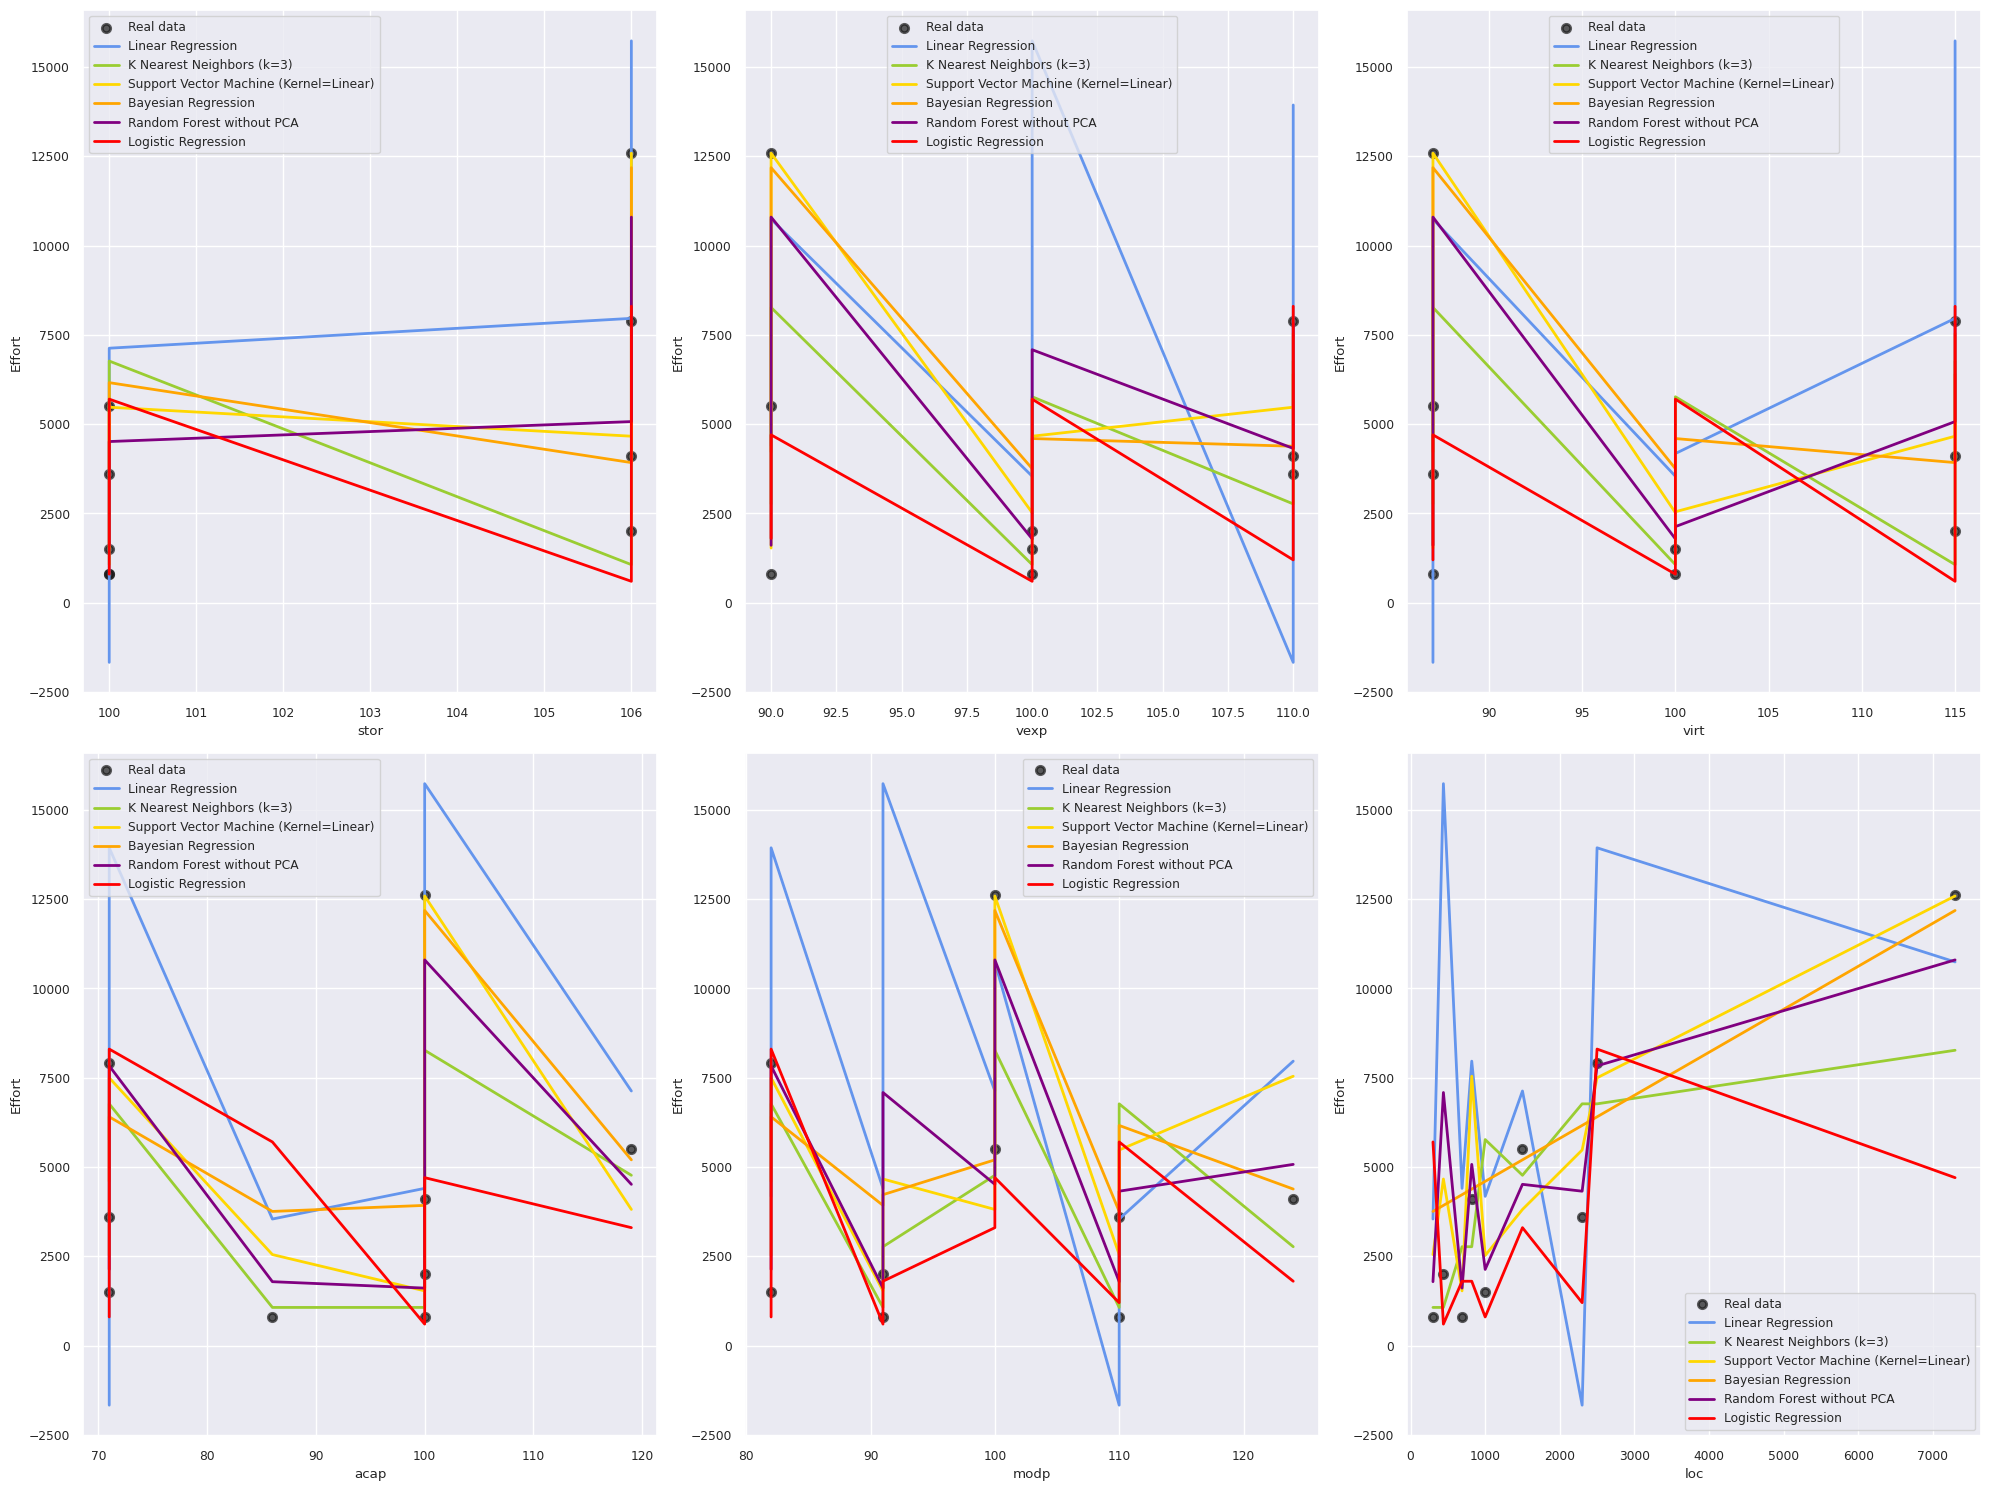

In [ ]:
# Define the features you want to visualize
features_to_visualize = max_corr_features[:6]  # Assuming you want to visualize the top 6 features

plt.figure(figsize=(20, 15))  # Mengatur ukuran gambar lebih besar

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)

    # Real data
    plt.scatter(X_test[feature], y_test, label='Real data', lw=2, alpha=0.7, c='k')

    # Linear Regression Model
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    plt.plot(model_xs, model_ys, lw=2, label='Linear Regression', c='cornflowerblue')

    # K-nearest Neighbors
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    plt.plot(xs, ys, lw=2, label='K Nearest Neighbors (k=3)', c='yellowgreen')

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    plt.plot(svc_model_xs, svc_model_ys, lw=2, label='Support Vector Machine (Kernel=Linear)', c='gold')

    # Bayesian Regression
    bayesian_xs, bayesian_ys = zip(*sorted(zip(X_test[feature], bayesian_model.predict(X_test))))
    plt.plot(bayesian_xs, bayesian_ys, lw=2, label='Bayesian Regression', c='orange')

    # Random Forest Regression without PCA
    rf_xs_no_pca, rf_ys_no_pca = zip(*sorted(zip(X_test[feature], regressor.predict(X_test))))
    plt.plot(rf_xs_no_pca, rf_ys_no_pca, lw=2, label='Random Forest without PCA', c='purple')

    # Logistic Regression
    logistic_xs, logistic_ys = zip(*sorted(zip(X_test[feature], logistic_model.predict(X_test))))
    plt.plot(logistic_xs, logistic_ys, lw=2, label='Logistic Regression', c='red')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

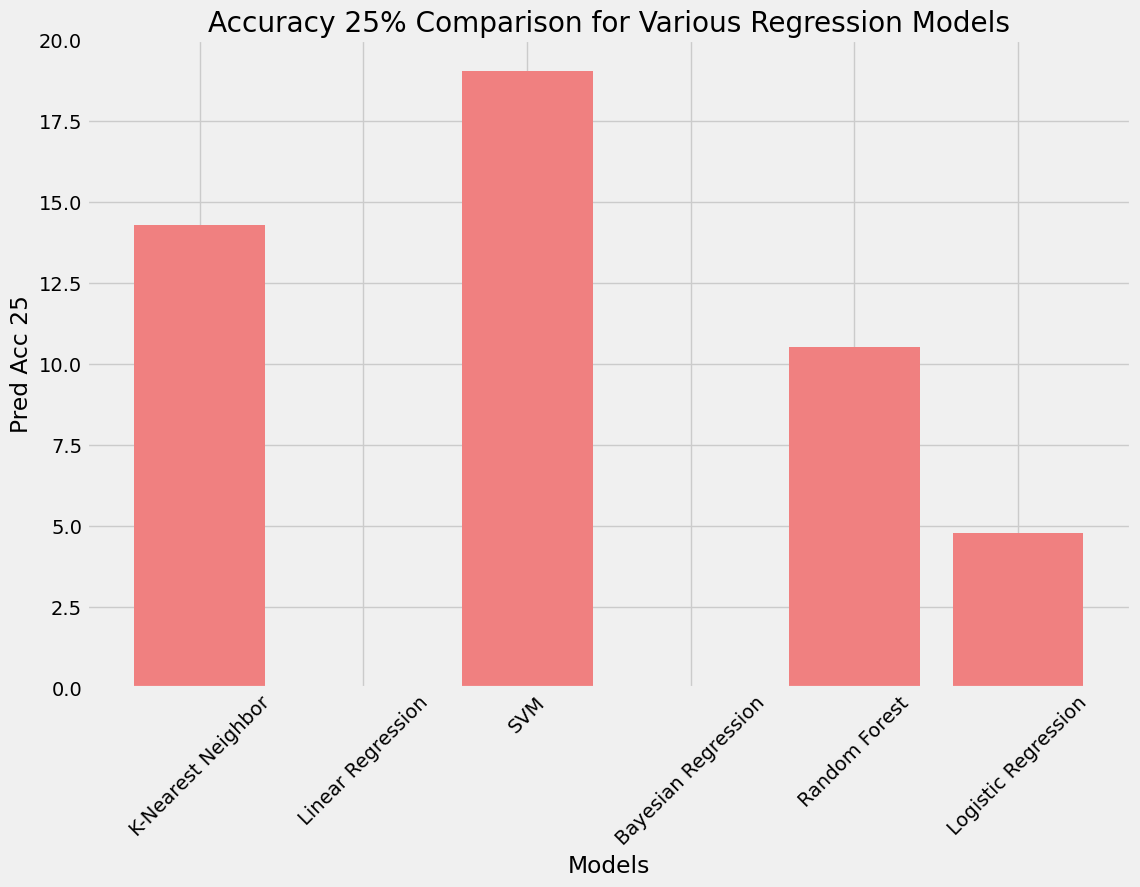

In [ ]:
acc_25_values= [
    acc_25_knn,
    acc_25_linear,
    acc_25_svm,
    acc_25_bayesian,
    acc_25_rf,
    acc_25_logistic
]

# grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, acc_25_values, color='lightcoral')
plt.title('Accuracy 25% Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('Pred Acc 25')
plt.xticks(rotation=45)
plt.show()

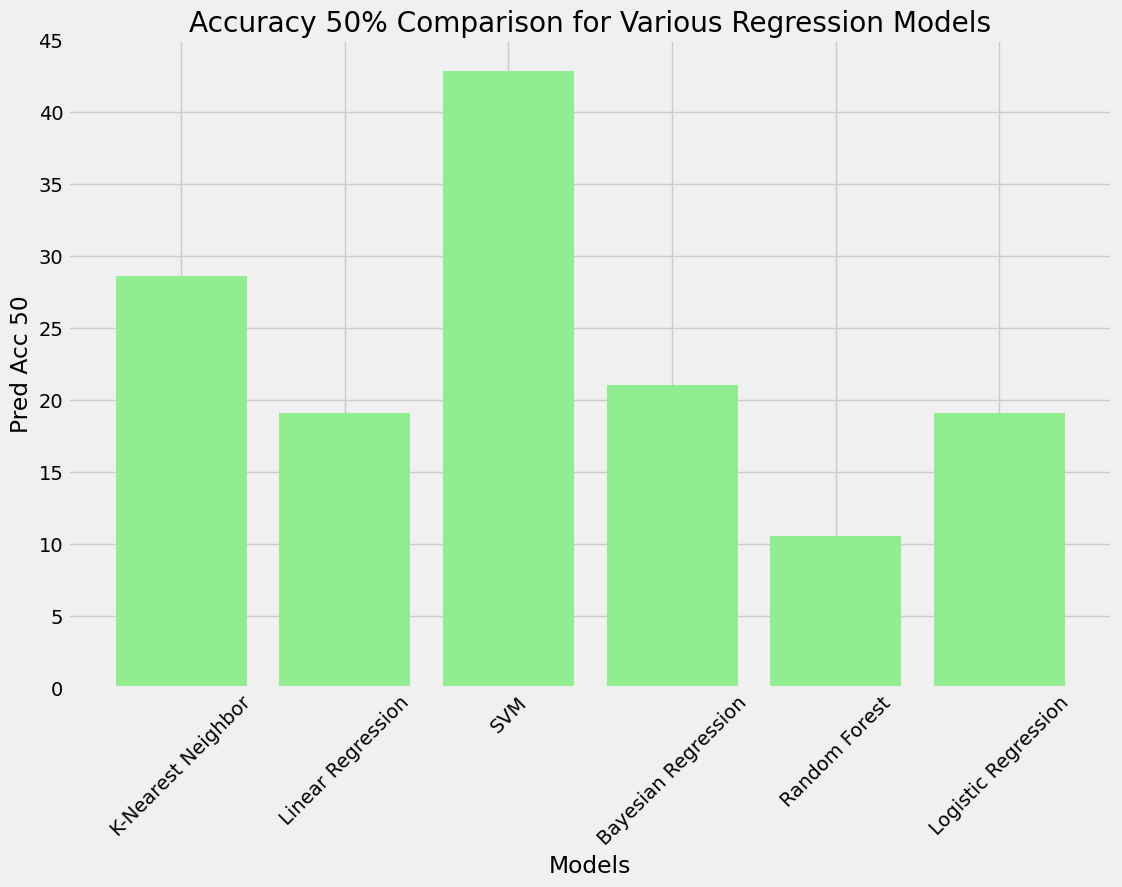

In [ ]:
acc_50_values= [
    acc_50_knn,
    acc_50_linear,
    acc_50_svm,
    acc_50_bayesian,
    acc_50_rf,
    acc_50_logistic
]

# grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, acc_50_values, color='lightgreen')
plt.title('Accuracy 50% Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('Pred Acc 50')
plt.xticks(rotation=45)
plt.show()

25% dan 50%

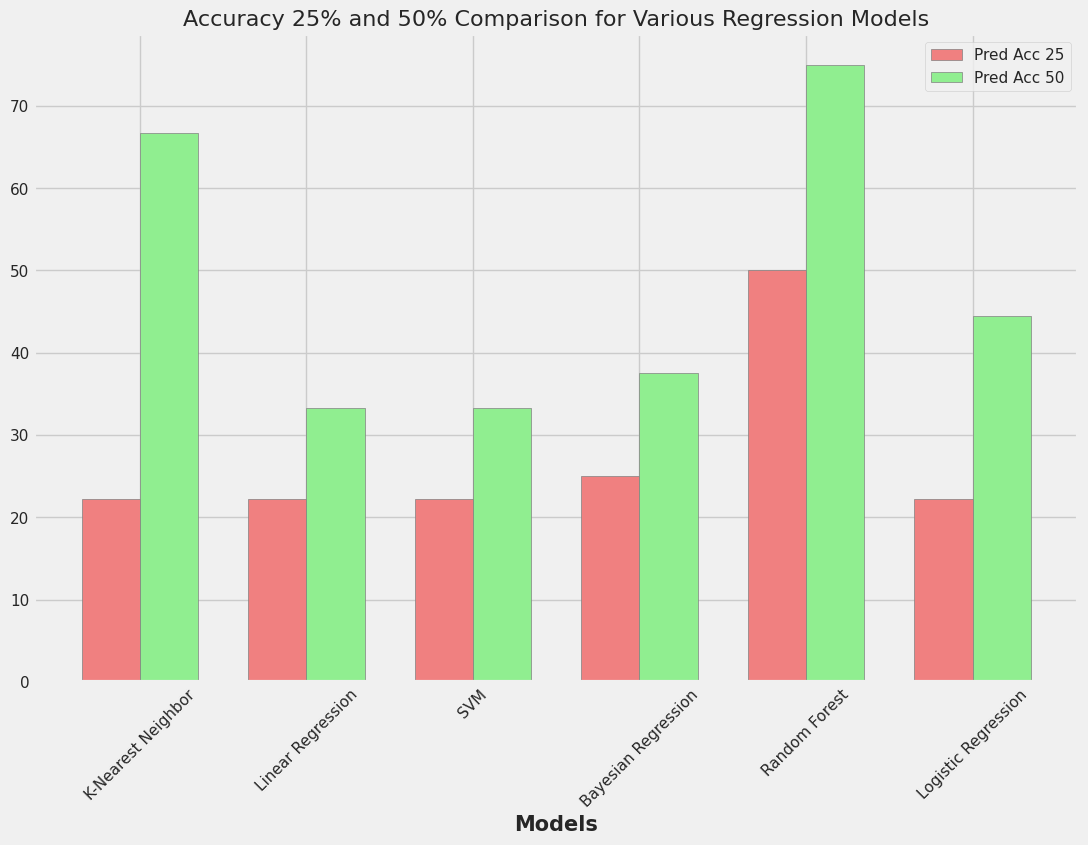

In [ ]:
# Data untuk prediksi accuracy 25%
acc_25_values = [acc_25_knn, acc_25_linear, acc_25_svm, acc_25_bayesian, acc_25_rf, acc_25_logistic]

# Data untuk prediksi accuracy 50%
acc_50_values = [acc_50_knn, acc_50_linear, acc_50_svm, acc_50_bayesian, acc_50_rf, acc_50_logistic]

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat posisi untuk grup bar
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))

# Plot untuk accuracy 25%
plt.bar(r1, acc_25_values, color='lightcoral', width=bar_width, edgecolor='grey', label='Pred Acc 25')

# Plot untuk accuracy 50%
plt.bar(r2, acc_50_values, color='lightgreen', width=bar_width, edgecolor='grey', label='Pred Acc 50')

# Atur label dan judul
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.title('Accuracy 25% and 50% Comparison for Various Regression Models', fontsize=16)
plt.legend()

# Tampilkan grafik
plt.show()

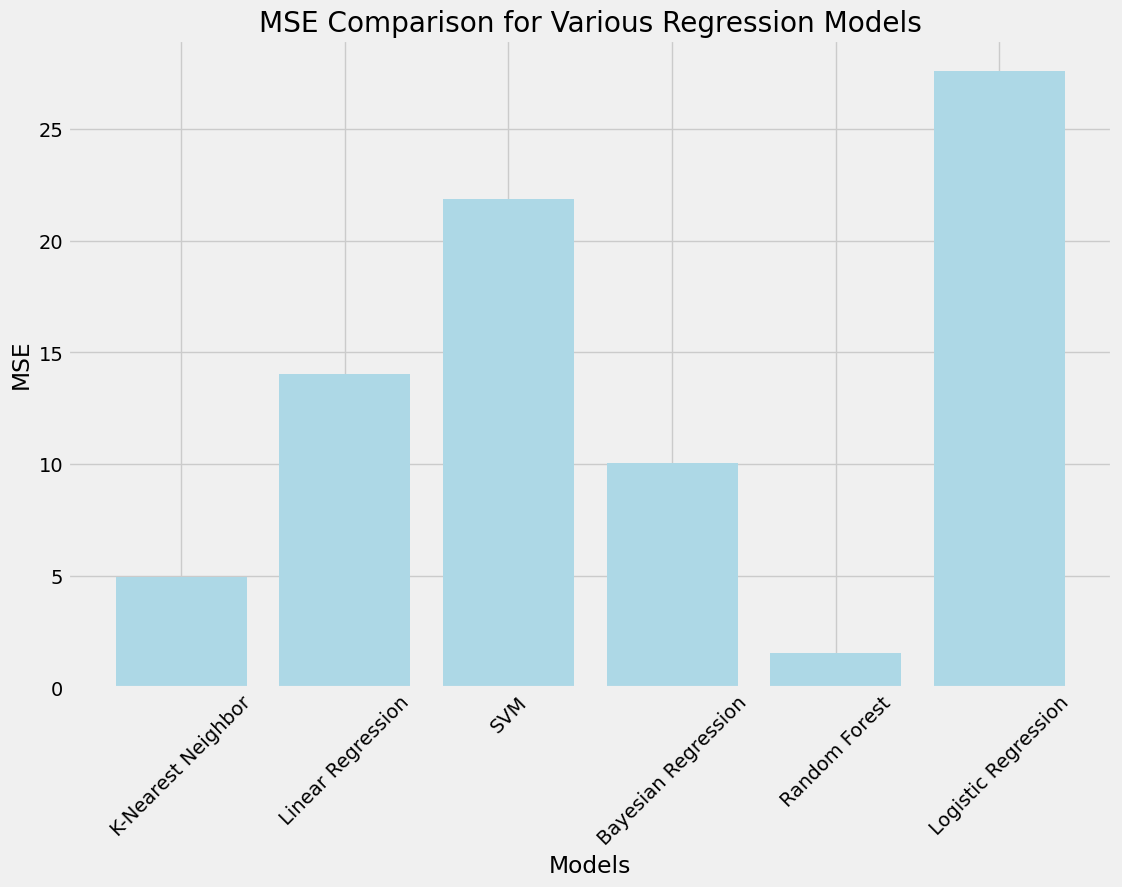

In [ ]:
mse_values = [
    mse_knn,
    mse_linear,
    mse_svm,
    mse_bayesian,
    mse_rf,
    mse_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models, mse_values, color='lightblue')
plt.title('MSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

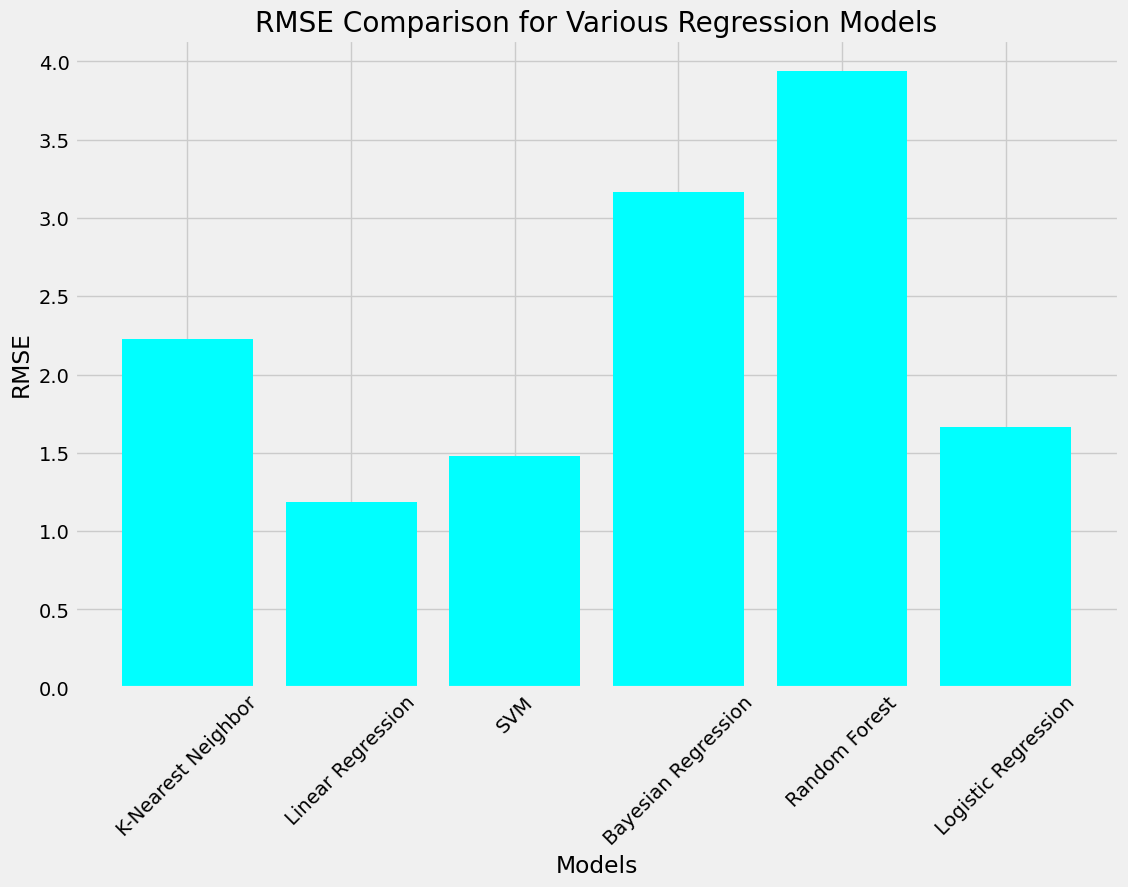

In [ ]:
rmse_values = [
    rmse_knn,
    rmse_linear,
    rmse_svm,
    rmse_bayesian,
    rmse_rf,
    rmse_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color='cyan')
plt.title('RMSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

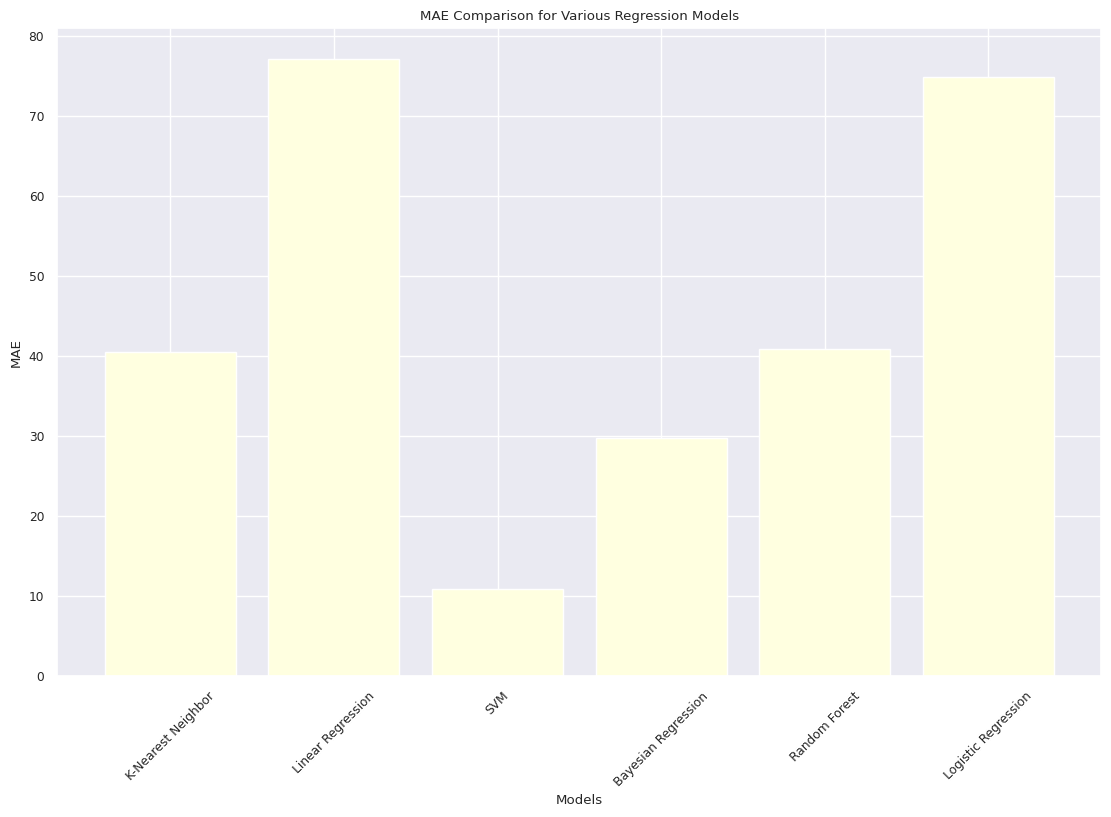

In [ ]:
mae_values = [
    mae_knn,
    mae_linear,
    mae_svm,
    mae_bayesian,
    mae_rf,
    mae_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models, mae_values, color='lightyellow')
plt.title('MAE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


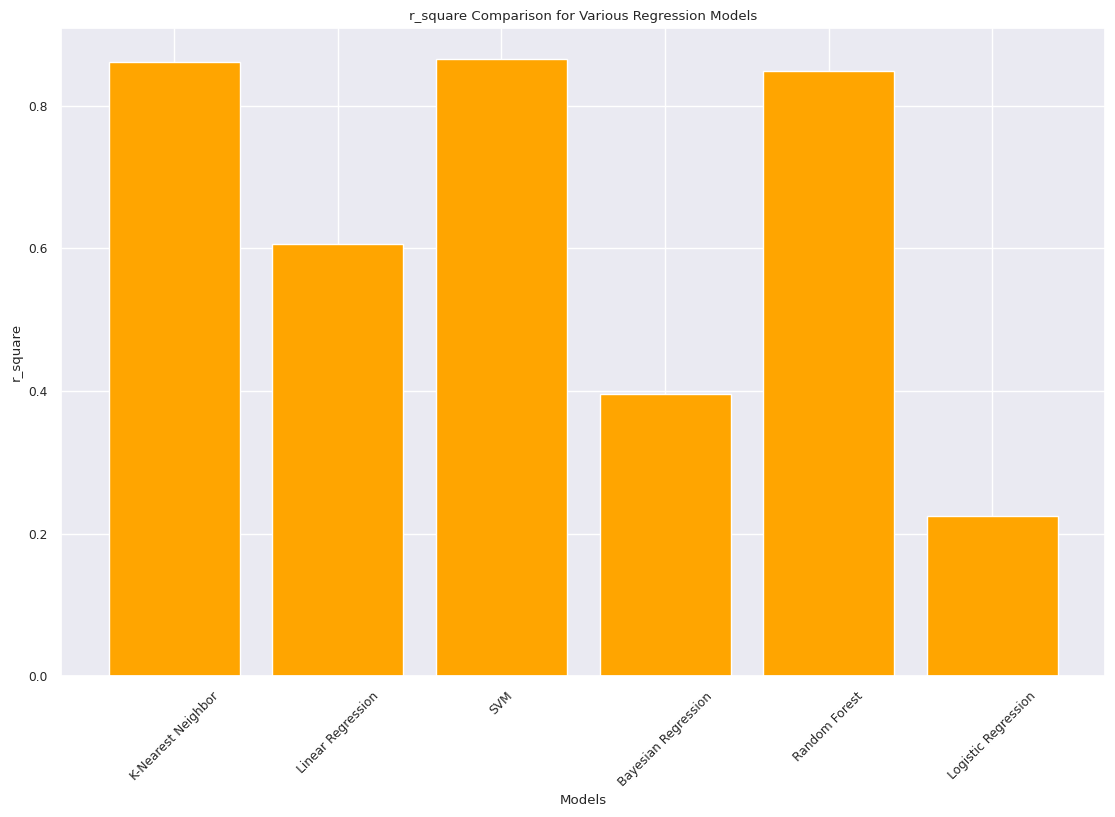

In [ ]:
r_square_values = [
    r_squared,
    r_square_linear,
    r_square_svm,
    r_square_bayesian,
    r_square_rf,
    r_square_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models, r_square_values, color='orange')
plt.title('r_square Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('r_square')
plt.xticks(rotation=45)
plt.show()

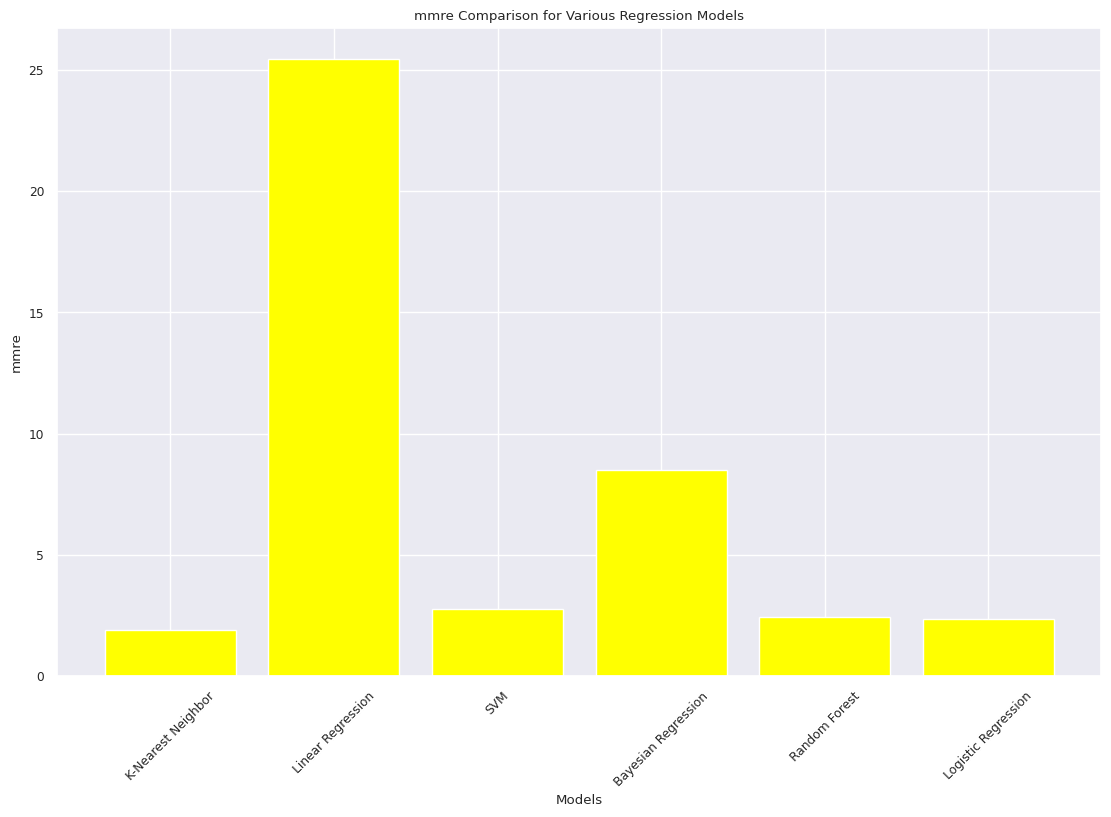

In [ ]:
mmre_values = [
    mmre_knn,
    mmre_linear,
    mmre_svm,
    mmre_bayesian,
    mmre_rf,
    mmre_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models,mmre_values, color='yellow')
plt.title('mmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmre')
plt.xticks(rotation=45)
plt.show()

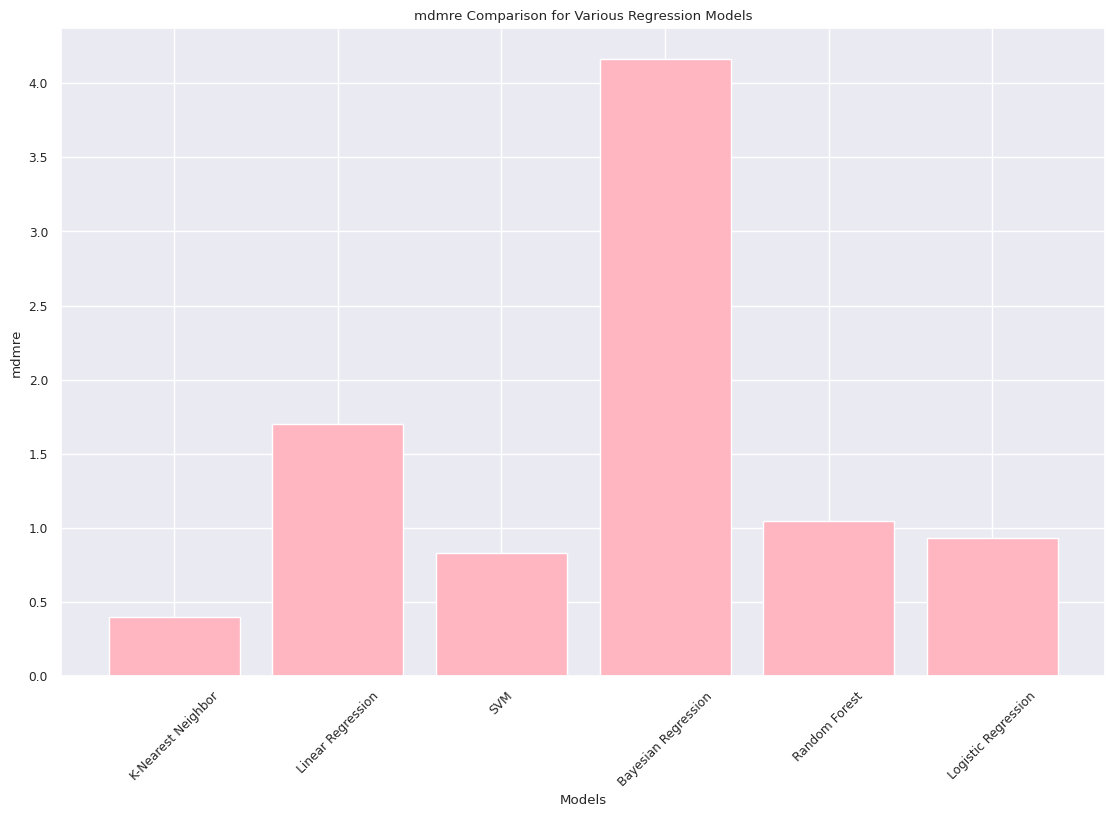

In [ ]:
mdmre_values = [
    mdmre_knn,
    mdmre_linear,
    mdmre_svm,
    mdmre_bayesian,
    mdmre_rf,
    mdmre_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models,mdmre_values, color='lightpink')
plt.title('mdmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mdmre')
plt.xticks(rotation=45)
plt.show()

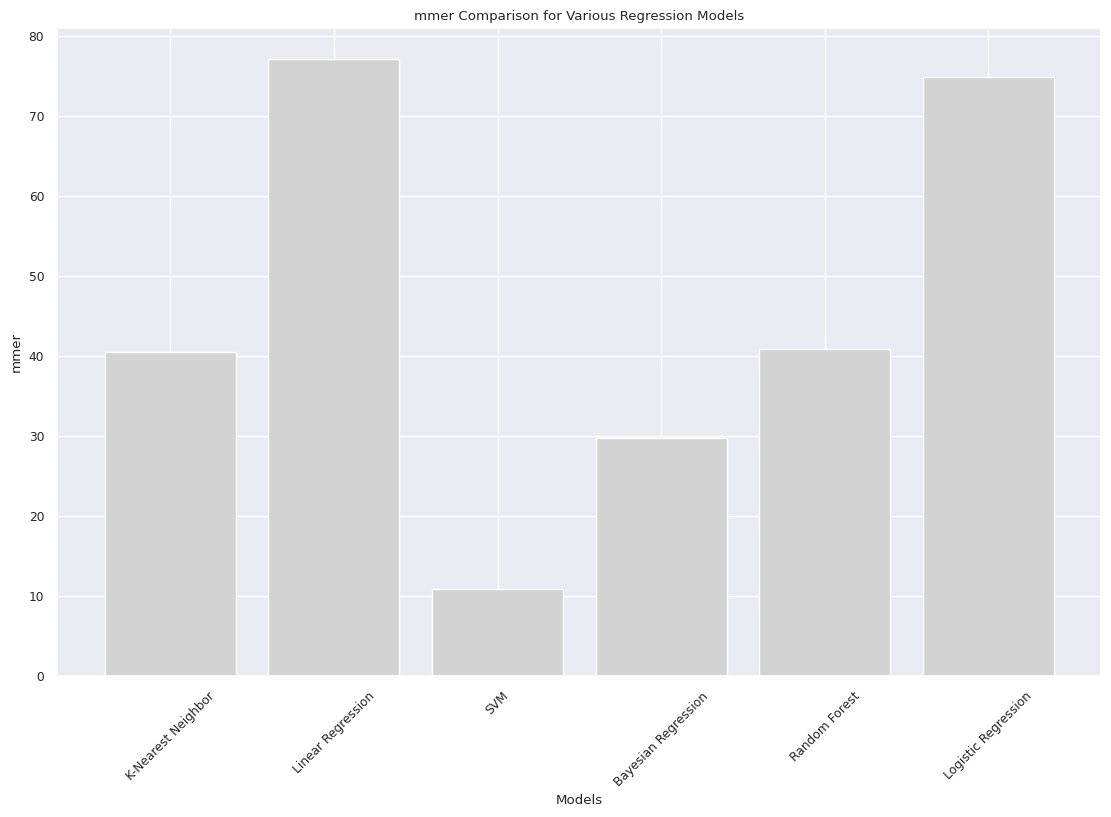

In [ ]:
mmer_values = [
    mmer_knn,
    mmer_linear,
    mmer_svm,
    mmer_bayesian,
    mmer_rf,
    mmer_logistic
]

plt.figure(figsize=(12, 8))
plt.bar(models,mmer_values, color='lightgrey')
plt.title('mmer Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmer')
plt.xticks(rotation=45)
plt.show()
